# Dataset
This dataset contains daily weather observations from numerous Australian weather stations such as Rainfall, Wind and Humidity.
Variable Descriptions:
•	RainTomorrow: The target variable. Did it rain the following day? YES/NO
•	Date: The date of observation
•	Location: The common name of the location of the weather station
•	MinTemp: The minimum temperature in degrees celsius
•	MaxTemp: The maximum temperature in degrees celsius
•	Rainfall: The amount of rainfall recorded for the day in mm
•	Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
•	Sunshine: The number of hours of bright sunshine in the day.
•	WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
•	WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
•	WindDir9am: Direction of the wind at 9am
•	WindDir3p: Direction of the wind at 3pm
•	WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
•	WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
•	Humidity9a: Humidity (percent) at 9am
•	Humidity3pm: Humidity (percent) at 3pm
•	Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
•	Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
•	Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
•	Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
•	Temp9am: Temperature (degrees C) at 9am
•	Temp3pm: Temperature (degrees C) at 3pm
•	RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
•	RISK_MM: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk". Will be left out in the model.


In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
import io
import requests
from io import StringIO
url="https://seanw2020.s3.amazonaws.com/CopyofweatherAUS.csv"
#s=requests.get(url).content
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))

headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:66.0) Gecko/20100101 Firefox/66.0"}
req = requests.get(url, headers=headers)
data = StringIO(req.text)

df = pd.read_csv(data)
##print(df)

In [3]:
# cleaning blank data

df.dropna(how='any', inplace=True)

#converting yes no to binary

df['RainTomorrow'] = df['RainTomorrow'].replace(to_replace=['No', 'Yes'], value=[0, 1])
df['RainToday'] = df['RainToday'].replace(to_replace=['No', 'Yes'], value=[0, 1])

df.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0.0,0
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0.0,0
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0.0,0
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0.0,0


In [4]:
# converting location to latittude and longitude
df['Longitude'] = ""
df['Latitude'] = ""
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,0,,
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,0,,
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,0,,
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,0,,
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,0,,


In [5]:
from opencage.geocoder import OpenCageGeocode
key = 'e46f1f204fe74ac3b95c31b98a5f377e'  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)

In [6]:
# find unique cities to minimize api call
cities = df['Location'].unique()

cities

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [7]:
# populating lan and lat for each row.

for city in cities:
    
    try:
    
        query = str(city) + ', Australia'

        result = geocoder.geocode(query) 


        lat = result[0]['geometry']['lat']
        long = result[0]['geometry']['lng']
        
        for index, row in df.iterrows(): # iterate over rows in dataframe
            City=row['Location']
        
            if City == city:
               # print(city)
                df.loc[index, 'Latitude'] = lat
                df.loc[index, 'Longitude'] = long
               # print(lat)
               # print(long)
    
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")  
    
    

In [8]:
df.head()        

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,0,145.834,-31.4983
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,0,145.834,-31.4983
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,0,145.834,-31.4983
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,0,145.834,-31.4983
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,0,145.834,-31.4983


In [9]:
new_df=df
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,0,145.834,-31.4983
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,0,145.834,-31.4983
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,0,145.834,-31.4983
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,0,145.834,-31.4983
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,0,145.834,-31.4983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,6/20/2017,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,1010.5,0.0,1.0,24.5,32.3,0,0.0,0,130.841,-12.4604
139109,6/21/2017,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,1011.2,7.0,0.0,24.8,32.0,0,0.0,0,130.841,-12.4604
139110,6/22/2017,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,1011.8,0.0,0.0,24.8,32.1,0,0.0,0,130.841,-12.4604
139111,6/23/2017,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,1010.7,1.0,1.0,24.8,29.2,0,0.0,0,130.841,-12.4604


In [10]:
copy_df=df
copy_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,0,145.834,-31.4983
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,0,145.834,-31.4983
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,0,145.834,-31.4983
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,0,145.834,-31.4983
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,0,145.834,-31.4983


In [11]:
working_df=df
working_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,0,0.0,0,145.834,-31.4983
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,0,0.0,0,145.834,-31.4983
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,0,0.0,0,145.834,-31.4983
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,0,0.0,0,145.834,-31.4983
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,1007.4,1.0,6.0,33.6,37.6,0,0.0,0,145.834,-31.4983


In [12]:

working_df['Month'] = pd.DatetimeIndex(df['Date']).month
working_df['Year'] = pd.DatetimeIndex(df['Date']).year
working_df['Day'] = pd.DatetimeIndex(df['Date']).day
# working_df = df.drop(['Date'], axis=1)

working_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude,Month,Year,Day
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,26.6,33.4,0,0.0,0,145.834,-31.4983,1,2009,1
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,20.3,27.0,0,0.0,0,145.834,-31.4983,1,2009,2
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,28.7,34.9,0,0.0,0,145.834,-31.4983,1,2009,4
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,29.1,35.6,0,0.0,0,145.834,-31.4983,1,2009,5
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,33.6,37.6,0,0.0,0,145.834,-31.4983,1,2009,6


In [13]:

working_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Longitude,Latitude,Month,Year,Day
5939,1/1/2009,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,26.6,33.4,0,0.0,0,145.834,-31.4983,1,2009,1
5940,1/2/2009,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,20.3,27.0,0,0.0,0,145.834,-31.4983,1,2009,2
5942,1/4/2009,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,28.7,34.9,0,0.0,0,145.834,-31.4983,1,2009,4
5943,1/5/2009,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,29.1,35.6,0,0.0,0,145.834,-31.4983,1,2009,5
5944,1/6/2009,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,33.6,37.6,0,0.0,0,145.834,-31.4983,1,2009,6


In [14]:
working_df1 = working_df.drop(columns=['Date','Location','RISK_MM'], axis=1)
working_df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Longitude,Latitude,Month,Year,Day
5939,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,...,5.0,26.6,33.4,0,0,145.834,-31.4983,1,2009,1
5940,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,...,1.0,20.3,27.0,0,0,145.834,-31.4983,1,2009,2
5942,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,...,6.0,28.7,34.9,0,0,145.834,-31.4983,1,2009,4
5943,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,...,5.0,29.1,35.6,0,0,145.834,-31.4983,1,2009,5
5944,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,...,6.0,33.6,37.6,0,0,145.834,-31.4983,1,2009,6


In [15]:
working_df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 5939 to 139112
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustDir    56420 non-null  object 
 6   WindGustSpeed  56420 non-null  float64
 7   WindDir9am     56420 non-null  object 
 8   WindDir3pm     56420 non-null  object 
 9   WindSpeed9am   56420 non-null  float64
 10  WindSpeed3pm   56420 non-null  float64
 11  Humidity9am    56420 non-null  float64
 12  Humidity3pm    56420 non-null  float64
 13  Pressure9am    56420 non-null  float64
 14  Pressure3pm    56420 non-null  float64
 15  Cloud9am       56420 non-null  float64
 16  Cloud3pm       56420 non-null  float64
 17  Temp9am        56420 non-null  float64
 18  Te

In [16]:
objects_cols = working_df1.select_dtypes("object")
objects_cols;

In [17]:
objects_cols = working_df1.select_dtypes("object")


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in objects_cols.columns:
    working_df1[col] = le.fit_transform(working_df1[col])

In [18]:
working_df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Longitude,Latitude,Month,Year,Day
5939,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,...,5.0,26.6,33.4,0,0,14,16,1,2009,1
5940,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,...,1.0,20.3,27.0,0,0,14,16,1,2009,2
5942,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,...,6.0,28.7,34.9,0,0,14,16,1,2009,4
5943,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,...,5.0,29.1,35.6,0,0,14,16,1,2009,5
5944,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,...,6.0,33.6,37.6,0,0,14,16,1,2009,6


In [19]:
working_df1=working_df1[['Longitude', 'Latitude', 'Month', 'Year', 'Day','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']]
working_df1.head()

,Longitude,Latitude,Month,Year,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,14,16,1,2009,1,17.9,35.2,0.0,12.0,12.3,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
5940,14,16,1,2009,2,18.4,28.9,0.0,14.8,13.0,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
5942,14,16,1,2009,4,19.4,37.6,0.0,10.8,10.6,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
5943,14,16,1,2009,5,21.9,38.4,0.0,11.4,12.2,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
5944,14,16,1,2009,6,24.2,41.0,0.0,11.2,8.4,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [20]:
clean_df=working_df1

In [21]:
clean_copy=clean_df

In [22]:
clean_df.to_csv ('Data\clean_df.csv', index = False, header=True)

In [23]:
dataset = pd.read_csv('Data/clean_df.csv')

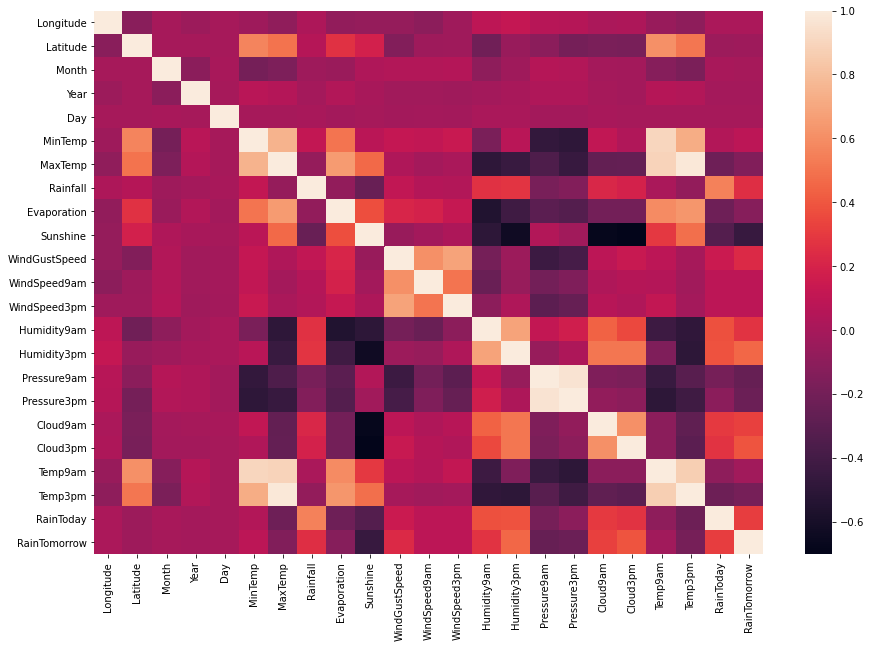

In [24]:
corr = dataset.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr)
plt.savefig('Output/heatmap.png')

In [25]:
graph = pd.read_csv('Data/model.csv',index_col=0)
graph = graph.drop(['Training Accuracy'], axis=1)
grapha = graph
grapha = graph[['Classification Accuracy','Precision','Recall','True Positive Rate','Specificity']]
graphe = graph[['Classification Error','False Positive Rate']]


In [26]:
graph_df = grapha.T 
graph_df


Model,Kernal SVM,Logistic Reg,SVM,K Nearest Neighbour,K Nearest Neighbour
Classification Accuracy,0.866572,0.858348,0.859412,0.853527,0.852818
Precision,0.958526,0.941374,0.952264,0.949088,0.943824
Recall,0.881121,0.884691,0.878075,0.874195,0.877119
True Positive Rate,0.881121,0.884691,0.878075,0.874195,0.877119
Specificity,0.784230,0.728571,0.755916,0.738095,0.724644


In [27]:
graphe_df = graphe.T 
graphe_df

Model,Kernal SVM,Logistic Reg,SVM,K Nearest Neighbour,K Nearest Neighbour
Classification Error,0.133428,0.141652,0.140588,0.146473,0.147182
False Positive Rate,0.215770,0.271429,0.244084,0.261905,0.275356


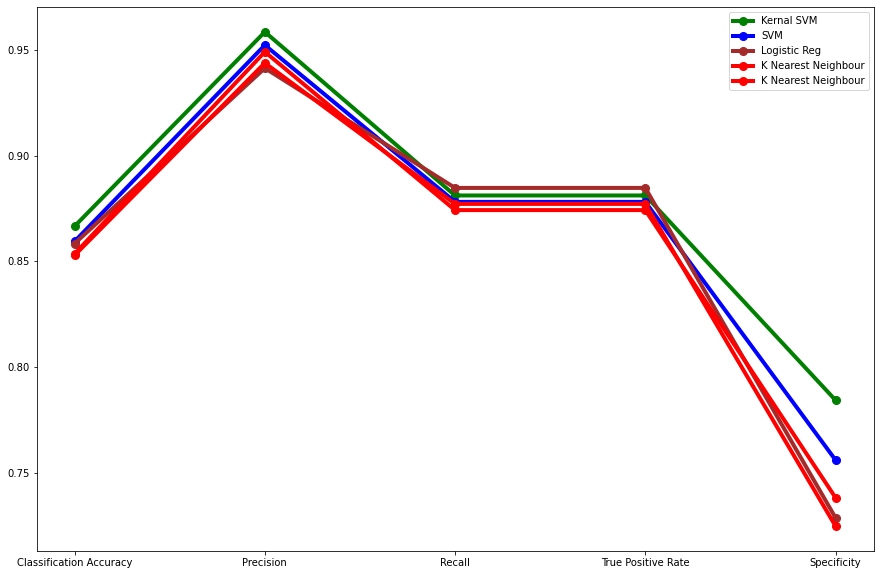

In [28]:
# multiple line plot
fig = plt.figure(figsize=(15,10))
plt.plot( 'Kernal SVM', data=graph_df, marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=4)
plt.plot( 'SVM', data=graph_df, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=4)
plt.plot( 'Logistic Reg', data=graph_df, marker='o', markerfacecolor='brown', markersize=8, color='brown', linewidth=4)
plt.plot( 'K Nearest Neighbour', data=graph_df, marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=4)
plt.savefig('Output/martixbymodel.png')
plt.legend()

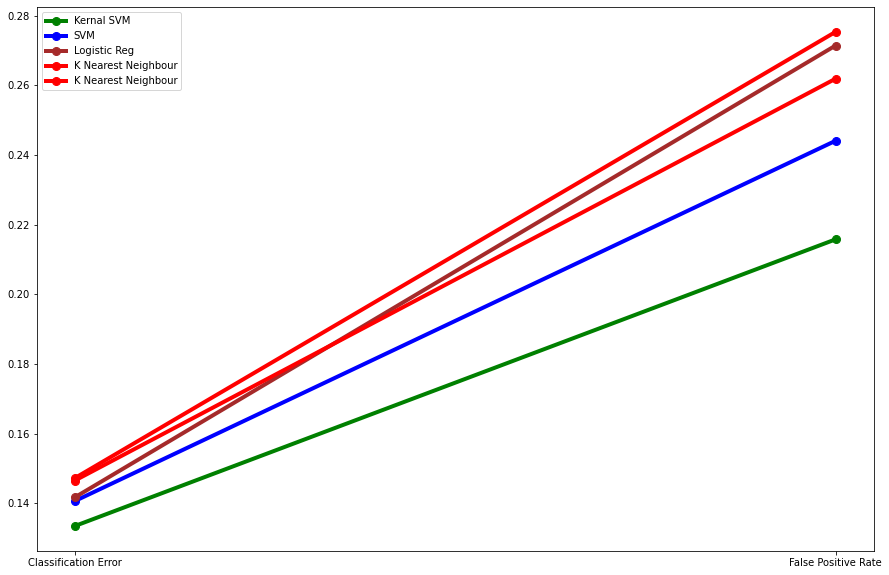

In [29]:
# multiple line plot
fig = plt.figure(figsize=(15,10))
plt.plot( 'Kernal SVM', data=graphe_df, marker='o', markerfacecolor='green', markersize=8, color='green', linewidth=4)
plt.plot( 'SVM', data=graphe_df, marker='o', markerfacecolor='blue', markersize=8, color='blue', linewidth=4)
plt.plot( 'Logistic Reg', data=graphe_df, marker='o', markerfacecolor='brown', markersize=8, color='brown', linewidth=4)
plt.plot( 'K Nearest Neighbour', data=graphe_df, marker='o', markerfacecolor='red', markersize=8, color='red', linewidth=4)
plt.savefig('Output/martixerrorbymodel.png')
plt.legend()

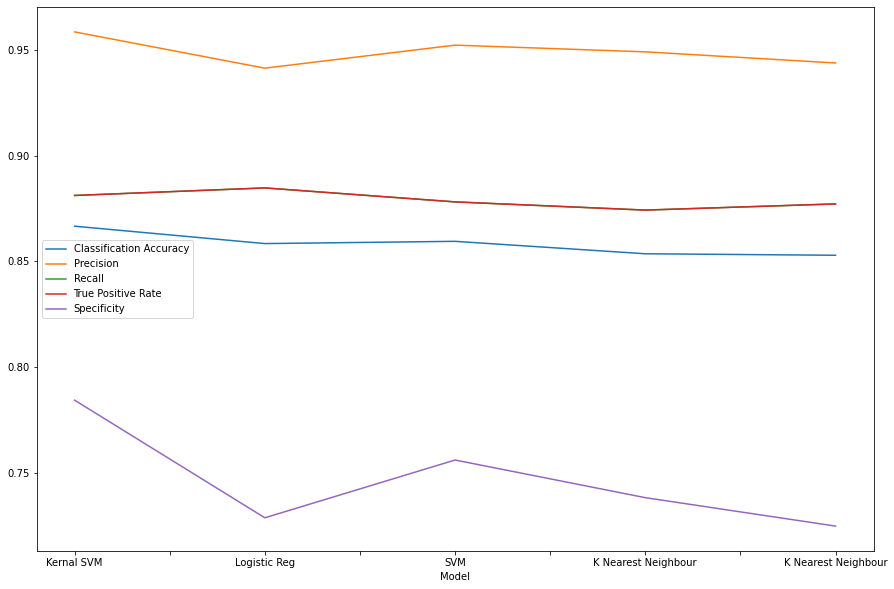

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

graph1 = pd.read_csv('Data/model.csv')
graph1 = graph1.drop(['Training Accuracy'], axis=1)
graph1

# gca stands for 'get current axis'
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
graph1.plot(kind='line',x='Model',y='Classification Accuracy',ax=ax)
#graph1.plot(kind='line',x='Model',y='Classification Error',ax=ax)
graph1.plot(kind='line',x='Model',y='Precision',ax=ax)
graph1.plot(kind='line',x='Model',y='Recall',ax=ax)
graph1.plot(kind='line',x='Model',y='True Positive Rate',ax=ax)
#graph1.plot(kind='line',x='Model',y='False Positive Rate',ax=ax)
graph1.plot(kind='line',x='Model',y='Specificity',ax=ax)
plt.savefig('Output/modelaccuricy.png')

plt.show()

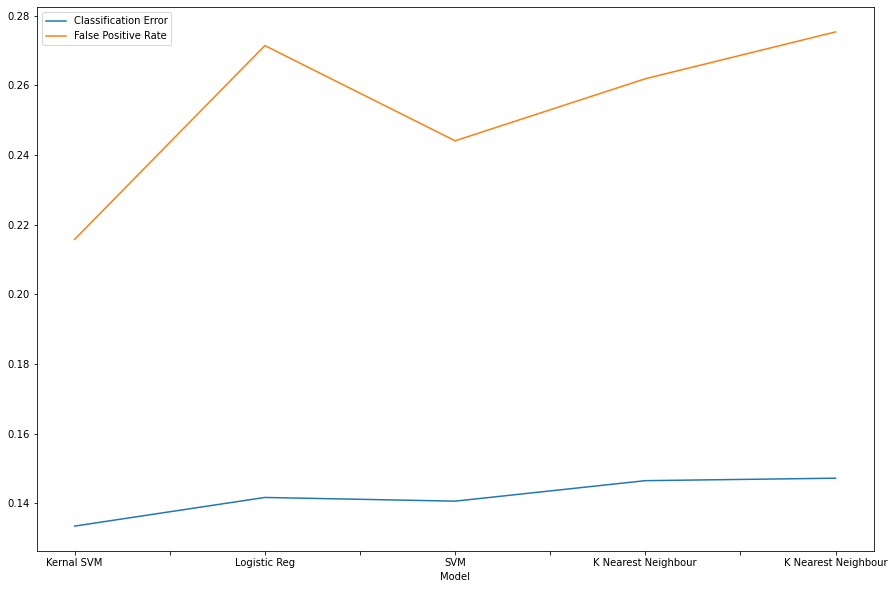

In [31]:
# gca stands for 'get current axis'
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
# graph1.plot(kind='line',x='Model',y='Classification Accuracy',ax=ax)
graph1.plot(kind='line',x='Model',y='Classification Error',ax=ax)
# graph1.plot(kind='line',x='Model',y='Precision',ax=ax)
# graph1.plot(kind='line',x='Model',y='Recall',ax=ax)
# graph1.plot(kind='line',x='Model',y='True Positive Rate',ax=ax)
graph1.plot(kind='line',x='Model',y='False Positive Rate',ax=ax)
# graph1.plot(kind='line',x='Model',y='Specificity',ax=ax)
plt.savefig('Output/modelerror.png')

plt.show()